## Use the S1.txt data file and plot the datapoints. Split the dataset into train and test set. Implement KNN algorithm on your own and classify the datapoints and then use sklearn's KNN to compare. 

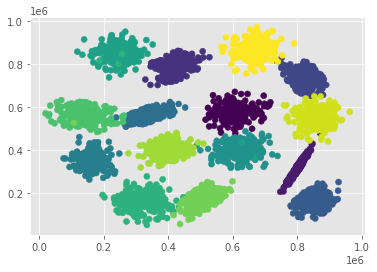

(1250, 2)
0.9912
[[ 91   0   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0  88   0   1   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0  79   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   1   0 103   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  80   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  69   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0 104   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  81   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  79   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  78   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  79   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0  76   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  75   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0  76   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  81]]
              precision    recall  f1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from math import sqrt
import random

df_x = pd.read_csv('S1.txt', sep="\s{4}",header=None, engine ='python') 
df_y = pd.read_csv('S1-labels.pa', header=None)
df_y = df_y.iloc[5:] 
plt.scatter(df_x[0], df_x[1], c=df_y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42)

print(X_test.shape)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test)) #0.9912
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [103]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train: 
        # Find distace between a point in train vs test_row
        dist = euclidean_distance(test_row[:2], train_row[:2])
        # Add the train point with corresponding distace as a tuple to the list
        distances.append((train_row, dist))
    # Using python sort function to sort list of tuples
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction


# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)
 
    
    
# Test the kNN on the dataset 
df_x = pd.read_csv('S1.txt', sep="\s{4}",header=None, engine ='python') 
df_y = pd.read_csv('S1-labels.pa', header=None)
df_y = df_y.iloc[5:] 
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train = df_train.to_numpy()
df_test = df_test.to_numpy()

preds = k_nearest_neighbors(df_train, df_test,15)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

#This is slow rather than Sklearn, and accuracy is not good than when use  sklearn model

[[40  0  0  7  0  0 12  0  0  0  0  0  0 34  0]
 [ 0 40  0  0  9  0  0  0  1  0  0 29  0  0 11]
 [ 0  0 56  0  0  0  0  0  0  0  0  0 21  0  3]
 [ 1  0  0 90  0  0  0  0  8  0  0  0  0  5  0]
 [ 0  2  0  3 49  0  0  0 20  0  0  6  0  0  0]
 [ 0  0  0  0  0 37  0  8  0  9 16  0  0  0  0]
 [ 1  0  0  0  0  0 84  0  0  2  0  0  0 17  0]
 [ 0  0  0  0  0  2  0 65  0 12  2  0  0  0  0]
 [ 0  0  0  6 36  0  0  0 35  1  0  2  0  0  0]
 [ 0  0  0  0  0  8  0 19  0 37 14  0  0  0  0]
 [ 0  0  0  0  0 33  0  5  0 15 26  0  0  0  0]
 [ 0 22  0  0  9  0  0  0  1  0  0 36  0  0  9]
 [ 0  0 21  0  0  0  0  0  0  0  0  0 46  0  8]
 [20  0  0  4  0  0 10  0  0  0  0  0  0 43  0]
 [ 0  8  2  0  0  0  0  0  0  0  0  5  5  1 61]]
              precision    recall  f1-score   support

           1       0.65      0.43      0.52        93
          10       0.56      0.44      0.49        90
          11       0.71      0.70      0.70        80
          12       0.82      0.87      0.84       104
        

In [11]:
from sklearn.metrics import classification_report, accuracy_score
from operator import itemgetter
import numpy as np
import math
from collections import Counter

In [ ]:
   
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def get_neighbors(training_set, test_instance, k):
    distances = list()
    for train_row in train: 
        # Find distace between a point in train vs test_row
        dist = euclidean_distance(test_row[:2], train_row[:2])
        # Add the train point with corresponding distace as a tuple to the list
        distances.append((train_row, dist))
    # Using python sort function to sort list of tuples
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors


def _get_tuple_distance(training_instance, test_instance):
    return (training_instance, euclidean_distance(test_instance, training_instance[0]))
 
def get_majority_vote(neighbours):
    classes = [neighbour[1] for neighbour in neighbours]
    count = Counter(classes)
    return count.most_common()[0][0] 


 
def main():
 
    df_x = pd.read_csv('S1.txt', sep="\s{4}",header=None, engine ='python') 
    df_y = pd.read_csv('S1-labels.pa', header=None)
    df_y = df_y.iloc[5:] 
    X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42) 
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    train = df_train.to_numpy()
    test = df_test.to_numpy()

 
    predictions = []
 
    k = 5
 
    for x in range(len(X_test)):
 
            print ('Classifying test instance number ' + str(x) + ":")
            neighbours = get_neighbors(training_set=train, test_instance=test[x][0], k=5)
            majority_vote = get_majority_vote(neighbours)
            predictions.append(majority_vote)
            print ('Predicted label=' + str(majority_vote) + ', Actual label=' + str(test[x][1]))
 
    print ('\nThe overall accuracy of the model is: ' + str(accuracy_score(y_test, predictions)))
    report = classification_report(y_test, predictions, target_names = iris.target_names)
    print ('A detailed classification report: \n\n' + report)

if __name__ == "__main__":
    main()

## Use S2.txt data file and plot the datapoints. Figure out the optimal clusters that can be formed and make clusters. Plot the datapoints and centroid.(Use both your own implementation and Sklearn's).

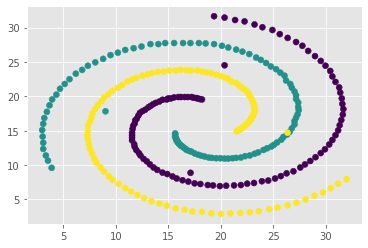

In [181]:
from sklearn.cluster import KMeans
df_x = pd.read_csv('S2.txt', sep="\t",header=None, engine ='python') 
plt.show()

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_x)
cents = kmeans.cluster_centers_

plt.scatter(df_x[0], df_x[1], c=df_x[2])
plt.scatter(cents[:,0], cents[:,1], c=cents[:,2])

[[19.62425544 15.91998931 19.90219595]
 [11.92986811 28.20011111 13.03192973]
 [ 2.52901807  2.55647397  2.156814  ]]


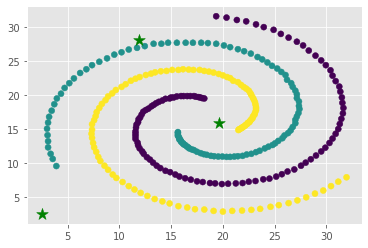

In [195]:
from copy import deepcopy
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

#plot data
df_x = pd.read_csv('S2.txt', sep="\t",header=None, engine ='python') 

# Number of clusters
k = 3
# Number of training data
n = df_x.shape[0]
# Number of features in the data
c = df_x.shape[1]  

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(df_x, axis = 0)
std = np.std(df_x, axis = 0)

#print(np.random.randn(k,c))
#print(std.values.reshape(-1,1))

centers = np.random.randn(k,c)*(std.values.reshape(-1,1)) + mean.values.reshape(-1,1)

print(centers)
plt.scatter(df_x[0], df_x[1], c=df_x[2])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

[[25.68021978 13.56263736  2.07692308]
 [17.1454918  23.15327869  1.97540984]
 [13.27979798 10.51161616  2.01010101]]


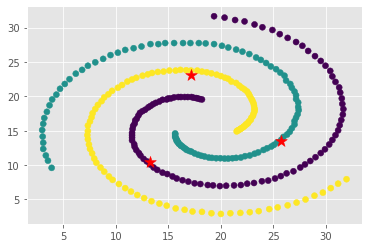

In [196]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(df_x - centers[i], axis=1) #길이 구하는 함수
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1) 
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(df_x[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)

print(centers_new)
plt.scatter(df_x[0], df_x[1], c=df_x[2])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)

# the manual kmeans that I implemented is very vurnerable to random K, so performance varies depending on random. 